# Importing the required libraries

In [101]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [102]:
#loading the data from csv to pandas DataFrame

In [103]:
df = pd.read_csv('train.csv')


In [104]:
# print the first 5 rows of the dataframe
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [105]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x2008a07da60>,
 [Text(-0.0021598929963621027, 1.0999978794807945, 'Fake'),
  Text(0.0021598929963617232, -1.0999978794807945, 'Real')])

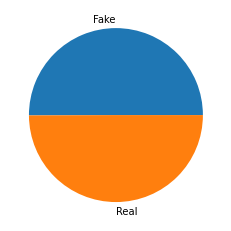

In [106]:
import matplotlib.pyplot as plt
plt.pie(df.label.value_counts(),labels=['Fake','Real'])


In [107]:
# data is balanced

In [109]:
#Finding the shape of the dataframe
df.shape

(20800, 5)

In [110]:
# checking the number of null values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [111]:
# filling the null values with empty string
df=df.fillna('')

In [113]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [114]:
# concatenating the author name and news title
df['content'] = df['author']+' '+df['title']

In [14]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [15]:
# separating the data & label
inputs = df.drop(columns='label', axis=1)
target = df['label']

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# printing the stopwords in English
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# text-preprocessing

In [115]:
#Stemming is the process of reducing a word to its Root word.Example:running,runner,run-> run

In [116]:
port_stem = PorterStemmer()

In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [24]:
df['content'] = df['content'].apply(stemming)

In [26]:
#separating the data and label
inputs= df['content']
target= df['label']

In [27]:
inputs

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [28]:
target

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [30]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(inputs)

inputs= vectorizer.transform(inputs)

In [32]:
print(inputs)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [35]:
#Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = 0.2, stratify=target, random_state=2)

In [36]:
lr_model = LogisticRegression()

# Training the Logistic Regression Model

In [37]:
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [152]:
# calculating the accuracy score on the training data and test data
print("score on test: " + str(lr_model.score(X_test, Y_test)))
print("score on train: "+ str(lr_model.score(X_train, Y_train)))

score on test: 0.9790865384615385
score on train: 0.9865985576923076


In [ ]:
from sklearn.svm import SVC

In [143]:
svm_model=SVC(C=1.0,kernel='rbf')
svm_model.fit(X_train,Y_train)

SVC()

In [154]:
# calculating the accuracy score on the training data and test data
print("score on train: "+ str(svm_model.score(X_train, Y_train)))
print("score on test: " + str(svm_model.score(X_test, Y_test)))

score on train: 0.9990985576923077
score on test: 0.9889423076923077


In [155]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB().fit(X_train, Y_train)


In [156]:
# calculating the accuracy score on the training data and test data
print("score on test: " + str(mnb_model.score(X_test, Y_test)))
print("score on train: "+ str(mnb_model.score(X_train, Y_train)))

score on test: 0.9550480769230769
score on train: 0.9782451923076924


In [147]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [157]:
bg_model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg_model.fit(X_train, Y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [158]:
# calculating the accuracy score on the training data and test data
print("score on test: " + str(bg.score(X_test, Y_test)))
print("score on train: "+ str(bg.score(X_train, Y_train)))

score on test: 0.9918269230769231
score on train: 0.9971153846153846


In [160]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf_model = RandomForestClassifier(n_estimators=30, max_depth=9)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=9, n_estimators=30)

In [161]:
print("score on test: " + str(rf_model.score(X_test, Y_test)))
print("score on train: "+ str(rf_model.score(X_train, Y_train)))

score on test: 0.9447115384615384
score on train: 0.9498798076923077


Used several models for this problem and concluded that BaggingClassifier is performing the best so I have taken this classifier for predictive system.

# Making the Predictive System

In [163]:
input_news=input("Enter The News ")
input_news=stemming(input_news)
inputs= vectorizer.transform([input_news])


# making prediction

prediction = bg_model.predict(inputs)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

Enter The News FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
[0]
The news is Real


In [165]:
#dumping the logistic model and vectorizer to a binary file
pickle.dump(bg_model,open('bg_model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))